# Theory Practical 2023: image analysis, optical flow, and motion detection

### imports for this practical

In [1]:
import skimage as ski
from skimage import io
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Part 1: images as arrays (exploration, tasks further below)

### The shape of an array is its dimensions

In [2]:
# A randomly generated 3 by 2 array
np.random.rand(3,2)

array([[0.91265289, 0.36237555],
       [0.30675788, 0.54218401],
       [0.26404944, 0.8604159 ]])

In [3]:
# A randomly generated 3 by 2 by 4 array
np.random.rand(3,2,4)

array([[[0.28338856, 0.98300289, 0.16904476, 0.91671911],
        [0.52602602, 0.462417  , 0.90916816, 0.04327158]],

       [[0.68424357, 0.73690096, 0.50590522, 0.85335307],
        [0.4540914 , 0.31036476, 0.08995939, 0.34171277]],

       [[0.53505509, 0.49872373, 0.84329109, 0.58672525],
        [0.73156632, 0.47124976, 0.25623033, 0.15059164]]])

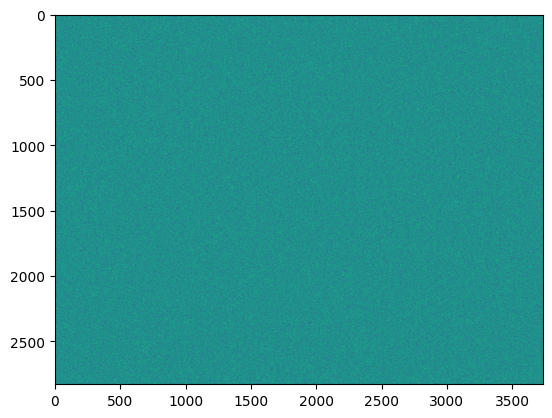

In [5]:
# A randomly generated 2829 by 3734 array, which you can also display as an image though it doesn't show much
plt.imshow(np.random.rand(2829,3734))

### Load image #1

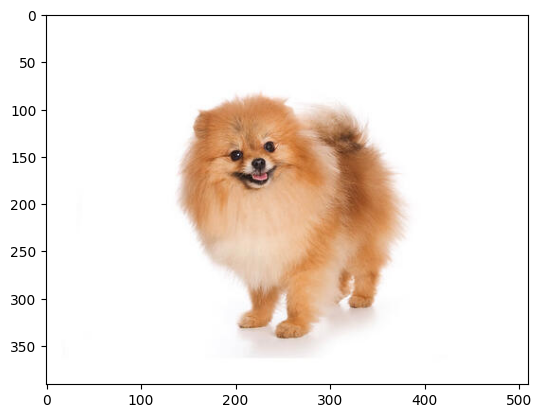

In [6]:
doggo = io.imread('spitz.jpg')
plt.imshow(doggo)

In [7]:
doggo.shape ## height, width, channels

(391, 510, 3)

### Load image #2

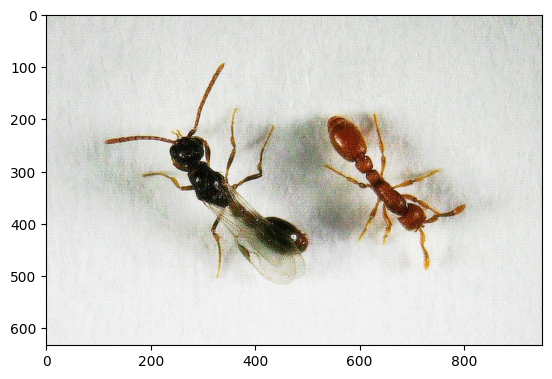

In [8]:
ants = io.imread('rf_ants.jpg')
plt.imshow(ants)

In [8]:
ants.shape

(633, 950, 3)

### Load image +3

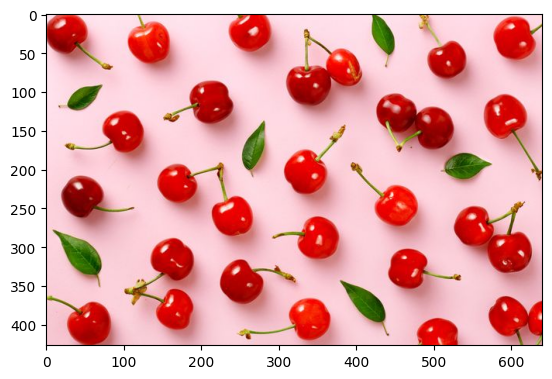

In [12]:
fruits = io.imread('count_fruits.jpg')
plt.imshow(fruits)

### Slicing an array = cropping an image

In [4]:
cropped_doggo = doggo[:,:250,:] # [x-coordinate slice (half), y-coordinate slice (all), channel slice (all)]
cropped_ants = ants[:,510:,:] 

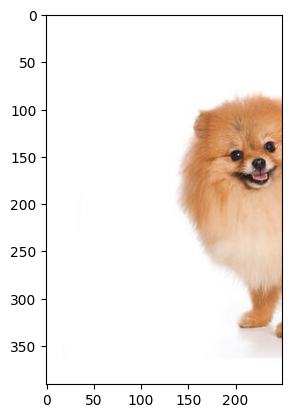

In [5]:
plt.imshow(cropped_doggo)

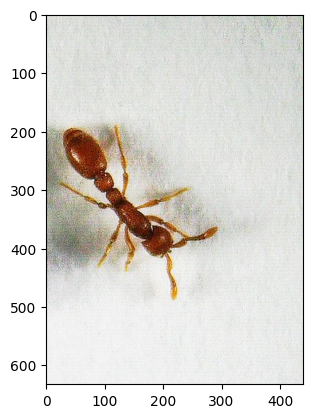

In [6]:
plt.imshow(cropped_ants)

### Conversion to grayscale

In [13]:
doggo_gs = ski.color.rgb2gray(doggo)
ants_gs = ski.color.rgb2gray(ants)
fruits_gs = ski.color.rgb2gray(fruits)

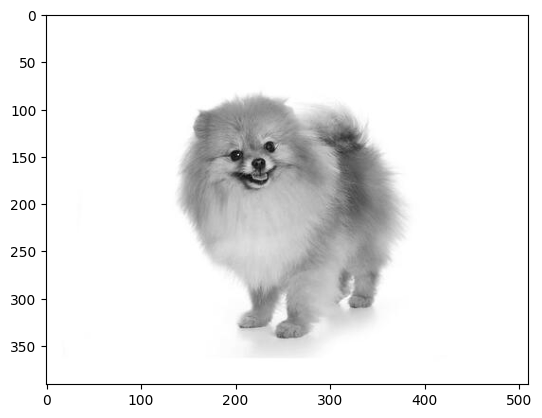

In [15]:
plt.imshow(doggo_gs, cmap='gray')

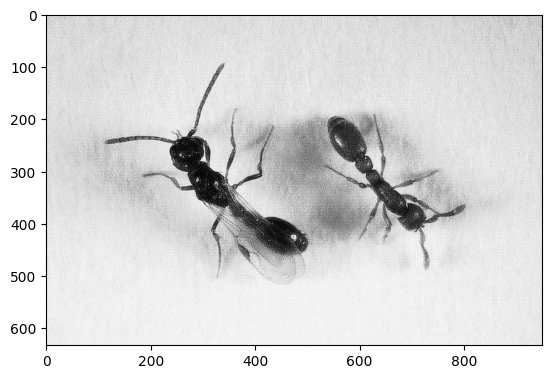

In [16]:
plt.imshow(ants_gs, cmap='gray')

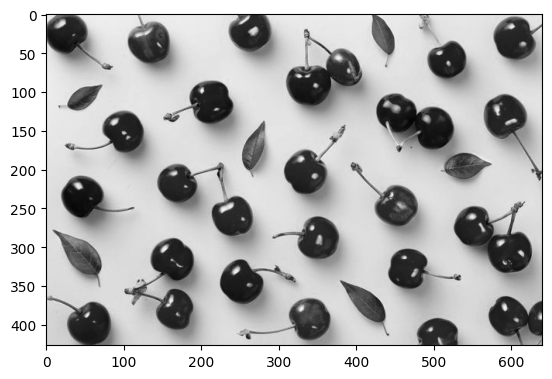

In [14]:
plt.imshow(fruits_gs, cmap='gray')

### TASK 1: Otsu thresholding and finding large connected components

Threshold the grayscale images into a binary arrays (0s and 1s only), and filter out which are actually the objects.

In [15]:
doggo_t = doggo_gs < ski.filters.threshold_otsu(doggo_gs)
ants_t = ants_gs < ski.filters.threshold_otsu(ants_gs)
fruits_t = fruits_gs < ski.filters.threshold_otsu(fruits_gs)

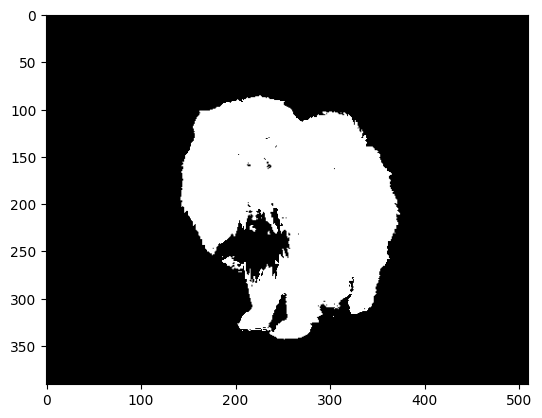

In [18]:
plt.imshow(doggo_t, cmap='gray')

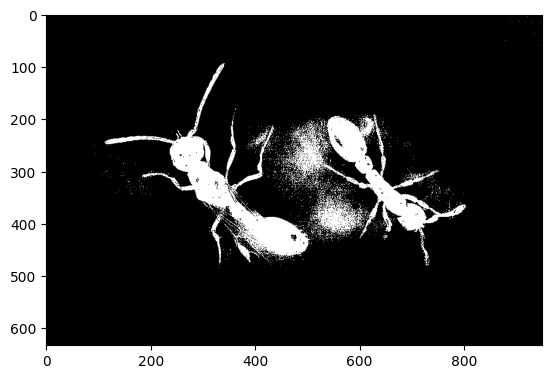

In [19]:
plt.imshow(ants_t, cmap='gray')

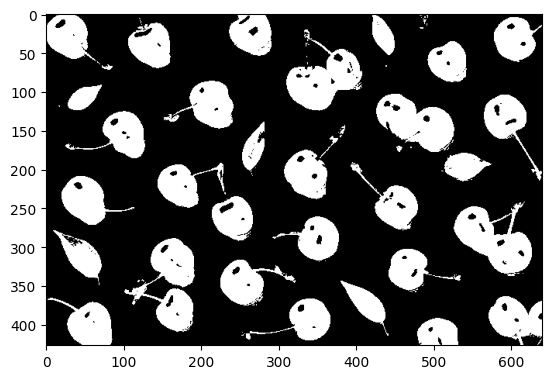

In [16]:
plt.imshow(fruits_t, cmap='gray')

### Finding and filtering of connected components

i.e. use thresholded/binarised images to find the objects, complete for dog and replicate for the other two

10 connected components detected
The areas of the objects are: [37959, 1, 1, 27, 8, 1, 3, 4, 1, 1] 



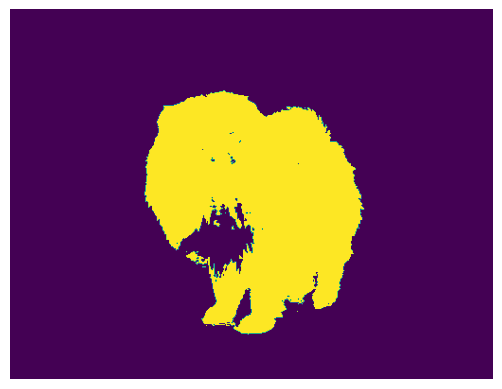

In [17]:
labeled_doggo, count = ski.measure.label(doggo_t, return_num=True)
print(count, 'connected components detected')

objects = ski.measure.regionprops(labeled_doggo)
object_areas = [obj["area"] for obj in objects]
print('The areas of the objects are:', object_areas, '\n')

plt.imshow(labeled_doggo > 0)
plt.axis('off')
plt.show()

## TASK 2: how many football players are there in these images?

Lille vs. Lyon: devise a way to count the number of Lille (red) players in the following images

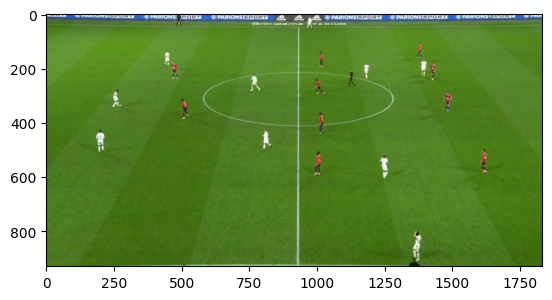

In [25]:
ll1 = io.imread('ll1.jpg')
plt.imshow(ll1)

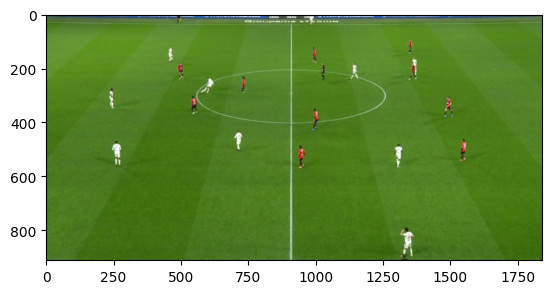

In [26]:
ll2 = io.imread('ll2.jpg')
plt.imshow(ll2)

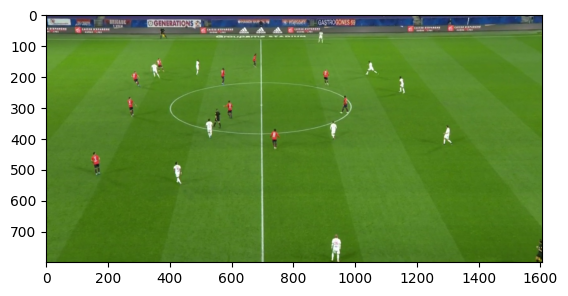

In [18]:
ll3 = io.imread('ll3.jpg')
plt.imshow(ll3)

## TASK 2 extension

Extend the above approach to count the number of blobs of each unique colour in the following image

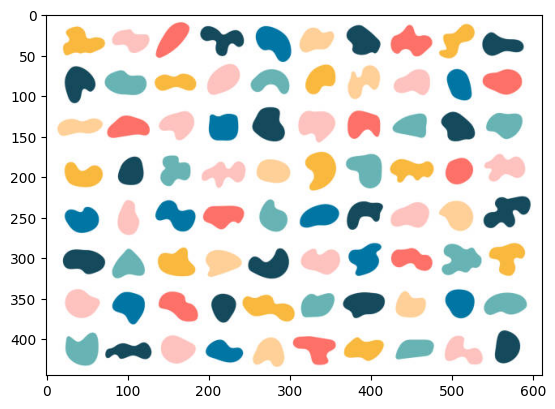

In [19]:
blobs = io.imread('colour_blobs.jpg')
plt.imshow(blobs)

## TASK 3: a biologically relevant application! 

Find a more advanced existing method that can allow you to blob-detect (affectionately known as segment) the fluorescently stained nuclei in the following image

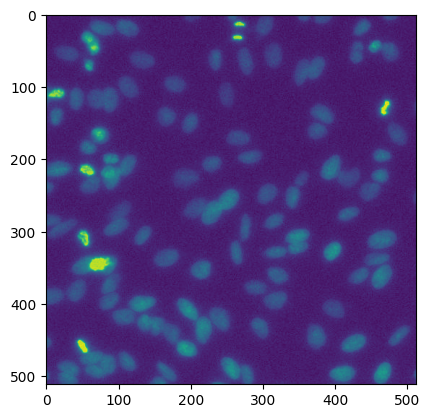

In [34]:
nuclei = io.imread('fluo_nuclei.jpg')
plt.imshow(nuclei)

In [35]:
### code here

# Part 2: Videos are sequences of images

If you want to read about optical flow: https://nanonets.com/blog/optical-flow/ & https://en.wikipedia.org/wiki/Optical_flow

## TASK 4: implementing optical flow

### Load a video of birds flying

In [55]:
cap = cv2.VideoCapture("birds.mp4") 
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Apply dense optical flow to generate a vector video similar to:

In [57]:
cap = cv2.VideoCapture("birds_OF.mp4") 
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.imshow('frame', gray)
    if cv2.waitKey(1) == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [58]:
### code here

# Challenge Tasks (open ended, see PDF)

You probably already know  OpenCV and other sources already have much more advanced packages for object detection and tracking, so in a mini-hackathon style, please use any and all existing tools now and just have some fun down here.

A useful tutorial on OpenCV pretrained object tracking modules: https://mpolinowski.github.io/docs/IoT-and-Machine-Learning/ML/2021-12-06--opencv-object-tracking/2021-12-06/

In [60]:
### space for work